# Control Hijacking Attacks
<b> Goal: Take over taraget machine </b>
<pre>
    • Buffer overflow (BOF) and integer overflow attacks.
    • String format vulns
    • Use after free
</pre>

<b> What is needed? </b>
<pre>
    • C functions, stacks, heaps.
    • exec() system call
    • Which OS is running
</pre>

## Linux process memory layout

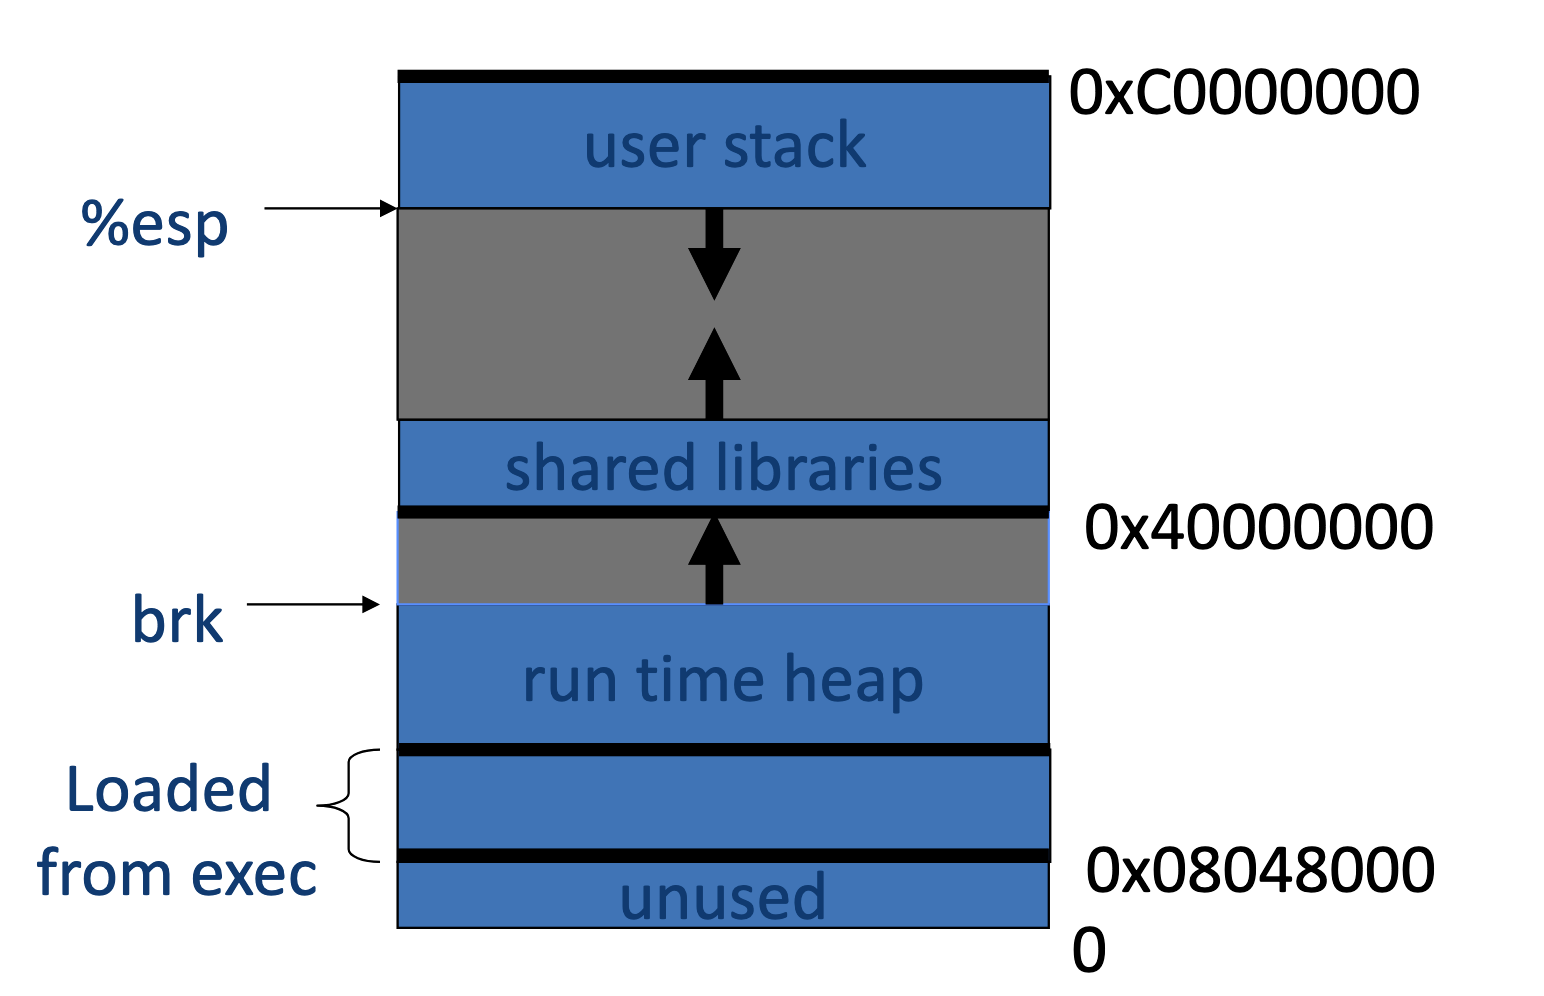

In [1]:
from IPython.display import Image
Image(filename='src/5.png') 

## Stack Frame

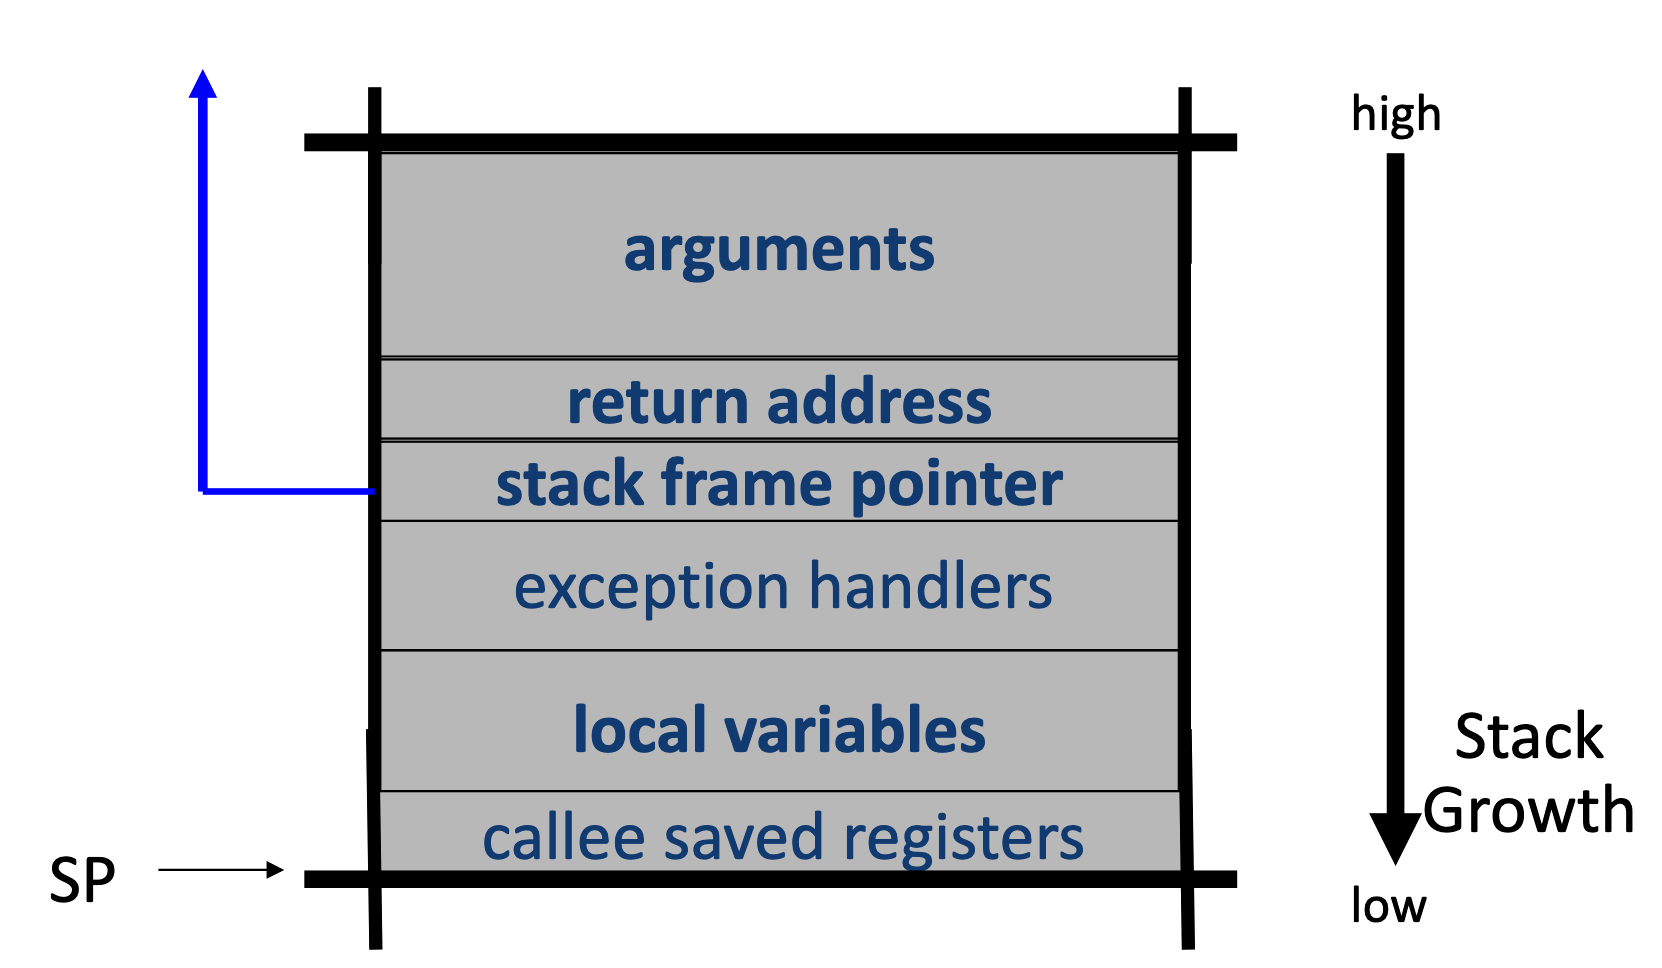

In [2]:
Image(filename='src/6.png') 

## BOF
Poison the return address
<pre>
    • Many unsafe libs: strcpy(), strcat(), gets(), scanf()
    • Exception handlers: Overwrite the address in stack frame.
    • Heap exploits: corrupt virtual tables
</pre>

## Integer overflow
Integer 32bits max vals = 2,147,483,647. When an attempt is made to store a value higher than Int max val it is know as an Integer overflow. The ISO C99 standard say it is an "undefined behaviors". Most compilers seem to ignore the overflow which leads to unexpected or errornous being stored.



### Exploiting 
<b>Trivial case </b>

Example 1:

```cpp
#include <stdio.h>
#include <string.h>
#include <stdlib.h>

using namespace std;

int main(int argc, char *argv[]){
    unsigned short s;
    int i;
    char buf[100];

    if(argc < 3){
        return -1;
    }

    i = atoi(argv[1]);
    s = i;

    if(s >= 100){           
        printf("Test\n");
        return -1;
    }

    printf("s = %d\n", s);

    memcpy(buf, argv[2], i);
    buf[i] = '\0';
    printf("%s\n", buf);

    return 0;
}

```

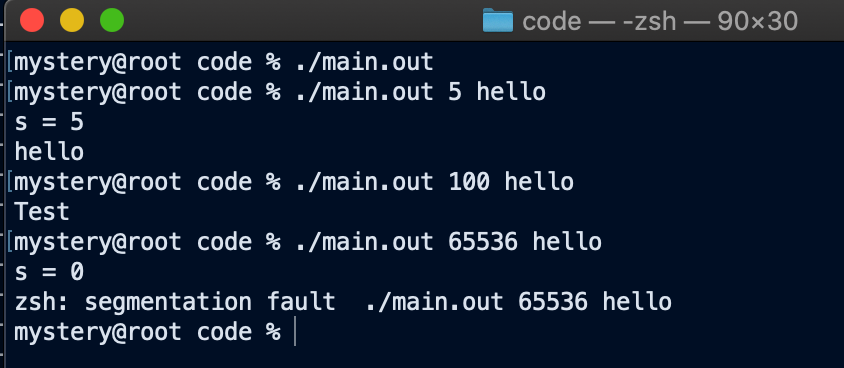

In [5]:
Image(filename='src/7.png') 